----
## Esercizio 6
----

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [8.0, 6.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':20,
    'savefig.directory':'./Images'

})

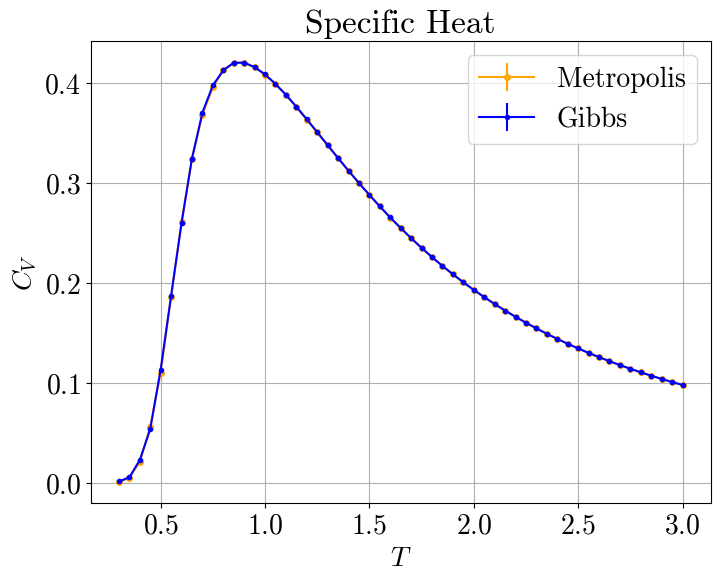

In [6]:
df_me = pd.read_csv('../METRO/cv_tot.dat',sep='\t')
plt.errorbar(df_me['TEMP'],df_me['AVERAGE'],df_me['ERROR'],marker='o',markersize=4,label='Metropolis',color='orange')
df_pres = pd.read_csv('../GIBBS/cv_tot.dat',sep='\t')
plt.errorbar(df_pres['TEMP'],df_pres['AVERAGE'],df_pres['ERROR'],marker='o',markersize=3,label='Gibbs',color='blue')
plt.title('Specific Heat')
plt.ylabel('$C_V$')
plt.xlabel('$T$')
plt.grid(True)
plt.legend()
plt.show()

### Gibbs Equilibration

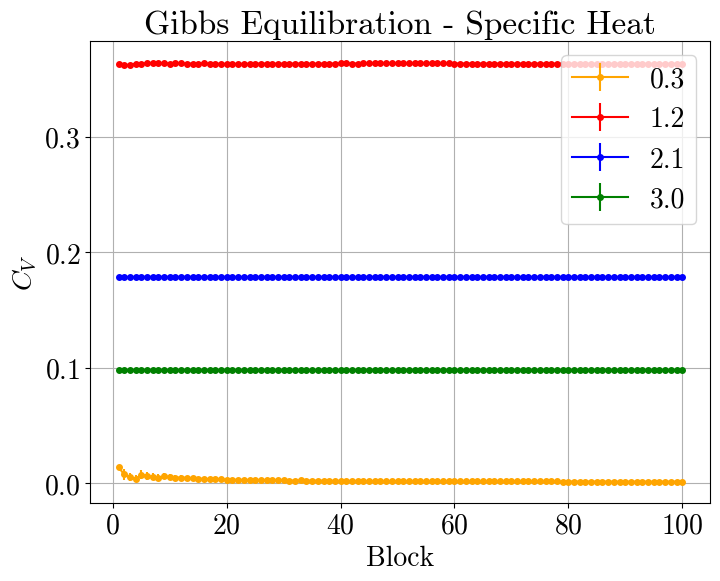

In [25]:
df_03=pd.read_csv('../GIBBS_EQUILIBRATION/0.3_specific_heat.dat',sep='\t')
df_12=pd.read_csv('../GIBBS_EQUILIBRATION/1.2_specific_heat.dat',sep='\t')
df_21=pd.read_csv('../GIBBS_EQUILIBRATION/2.1_specific_heat.dat',sep='\t')
df_30=pd.read_csv('../GIBBS_EQUILIBRATION/3.0_specific_heat.dat',sep='\t')
plt.errorbar(df_03['#BLOCK:'],df_03['CV_AVE:'],df_03['ERROR:'],marker='o',markersize=4,label='0.3',color='orange')
plt.errorbar(df_12['#BLOCK:'],df_12['CV_AVE:'],df_12['ERROR:'],marker='o',markersize=4,label='1.2',color='red')
plt.errorbar(df_21['#BLOCK:'],df_21['CV_AVE:'],df_21['ERROR:'],marker='o',markersize=4,label='2.1',color='blue')
plt.errorbar(df_30['#BLOCK:'],df_30['CV_AVE:'],df_30['ERROR:'],marker='o',markersize=4,label='3.0',color='green')
plt.title('Gibbs Equilibration - Specific Heat')
plt.ylabel('$C_V$')
plt.xlabel('Block')
plt.legend()
plt.grid()
plt.show()


### Metropolis Equilibration

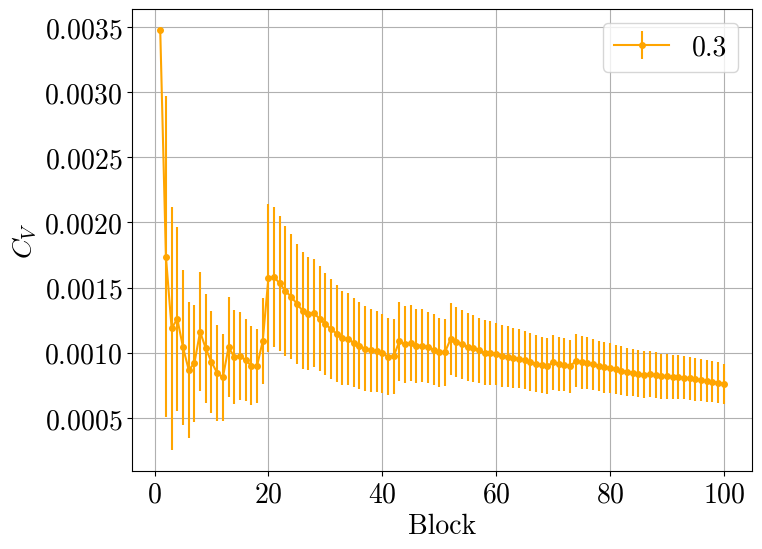

In [26]:
df_03=pd.read_csv('../METRO_EQUILIBRATION/0.3_specific_heat.dat',sep='\t')
df_12=pd.read_csv('../METRO_EQUILIBRATION/1.2_specific_heat.dat',sep='\t')
df_21=pd.read_csv('../METRO_EQUILIBRATION/2.1_specific_heat.dat',sep='\t')
df_30=pd.read_csv('../METRO_EQUILIBRATION/3.0_specific_heat.dat',sep='\t')
plt.errorbar(df_03['#BLOCK:'],df_03['CV_AVE:'],df_03['ERROR:'],marker='o',markersize=4,label='0.3',color='orange')
#plt.errorbar(df_12['#BLOCK:'],df_12['CV_AVE:'],df_12['ERROR:'],marker='o',markersize=4,label='1.2',color='red')
#plt.errorbar(df_21['#BLOCK:'],df_21['CV_AVE:'],df_21['ERROR:'],marker='o',markersize=4,label='2.1',color='blue')
#plt.errorbar(df_30['#BLOCK:'],df_30['CV_AVE:'],df_30['ERROR:'],marker='o',markersize=4,label='3.0',color='green')
#plt.title('Metro Equilibration - Specific Heat')
plt.ylabel('$C_V$')
plt.xlabel('Block')
plt.legend()
plt.grid()
plt.show()

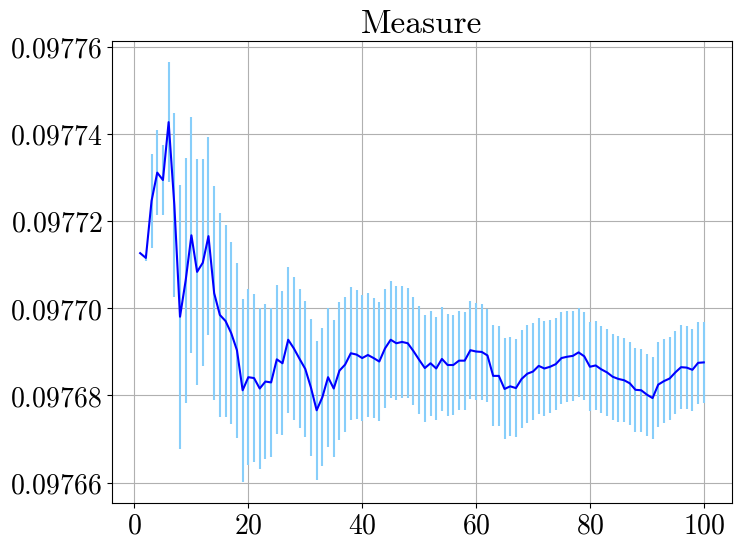

In [50]:
df_temp = pd.read_csv('specific_heat.dat',sep='\t')
plt.errorbar(df_temp.iloc[:,0],df_temp.iloc[:,2],df_temp.iloc[:,3],color='blue',ecolor='lightskyblue')
plt.title('Measure')
plt.grid(True)
plt.show()

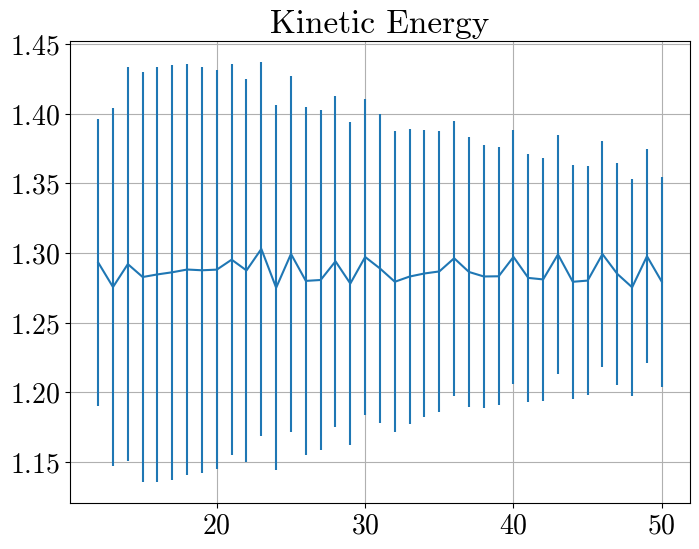

In [6]:
df_kin = pd.read_csv('kinetic_energy.dat',sep='\t')


#x = np.arange(len(df_kin))+1
#x*=1000
plt.errorbar(df_kin.iloc[:,1],df_kin.iloc[:,2],df_kin.iloc[:,4])
plt.title('Kinetic Energy')
#plt.xlabel('blocchi')
#plt.ylabel('$C$')
plt.grid(True)
plt.show()

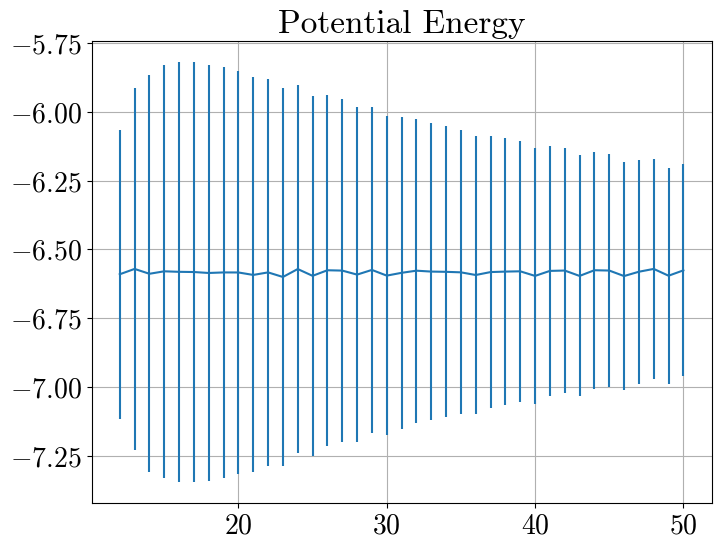

In [7]:
df_pot = pd.read_csv('potential_energy.dat',sep='\t')
#x = np.arange(len(df_pot))+1
#x*=1000
plt.errorbar(df_pot.iloc[:,1],df_pot.iloc[:,2],df_pot.iloc[:,4])
plt.title('Potential Energy')
#plt.xlabel('blocchi')
#plt.ylabel('$C$')
plt.grid(True)
plt.show()

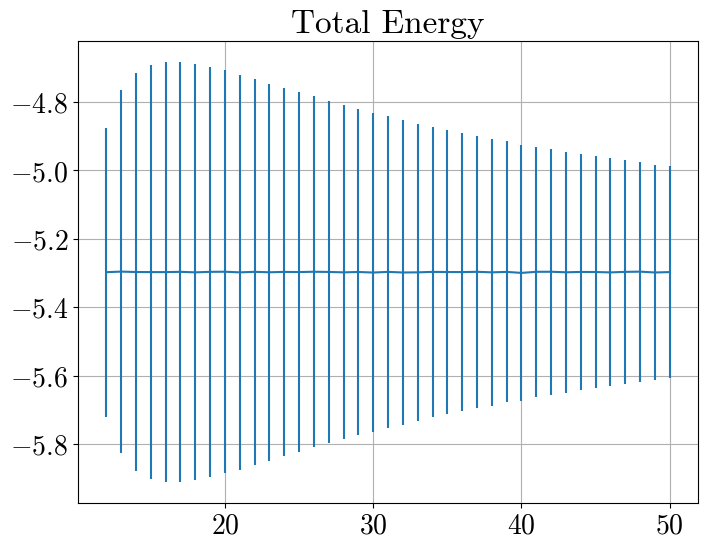

In [8]:
df_eng = pd.read_csv('total_energy.dat',sep='\t')

plt.errorbar(df_eng.iloc[:,1],df_eng.iloc[:,2],df_eng.iloc[:,4])
plt.title('Total Energy')
plt.grid(True)
plt.show()

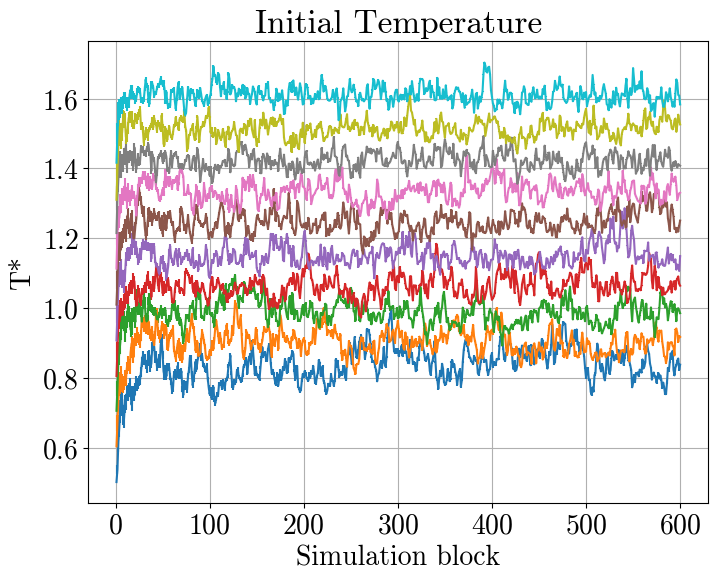

In [14]:
n=10
abc=np.zeros((n,9))
x1=np.zeros(n)
    
for i in range(0,n):
    dt = pd.read_csv('Gas/temperature_'+str(i)+'.dat',sep='\t')
    x1[i]=0.5+0.1*i
    plt.errorbar(dt.iloc[:,1],dt.iloc[:,2],dt.iloc[:,4],label=str(i+1))
    for j in range(0,9):
        x = dt.iloc[(j+1)*60:600,1]
        ab = np.polyfit(x,dt.iloc[(j+1)*60:600,2],0)
        abc[i,j] = ab[0]
    #plt.plot(x,abc[i,0]*x/x)
    #print(x1[i],'\t',abc[i],'\t',abc[i]-x1[i])

#plt.legend()
plt.ylabel('T*')
plt.xlabel('Simulation block')
plt.title('Initial Temperature')
plt.grid(True)
plt.show()

In [10]:
np.arange(1,9)

array([1, 2, 3, 4, 5, 6, 7, 8])

Text(0.5, 1.0, 'Mean Temperature from x-th to 100-th block')

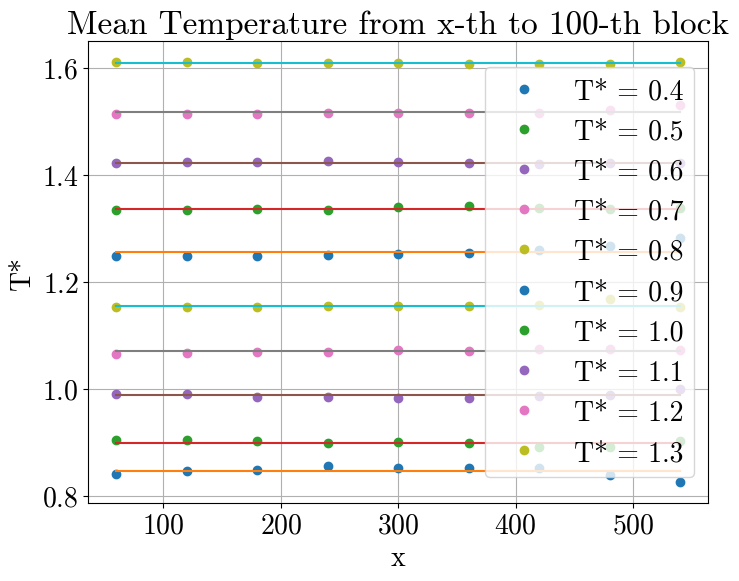

In [15]:
b=np.arange(1,10)*60
ber=np.zeros(10)
for i in range(0,10):
    plt.plot(b,abc[i,:],'o',label='T* = '+str(int(4+1*i)/10))
    a=np.polyfit(b,abc[i,:],0)
    ber[i]=a[0]
    plt.plot(b,ber[i]*b/b)
plt.grid()
plt.xlabel('x')
plt.ylabel('T*')
plt.legend(loc='center right')
plt.title('Mean Temperature from x-th to 100-th block')

[0.86432896 0.38920848]


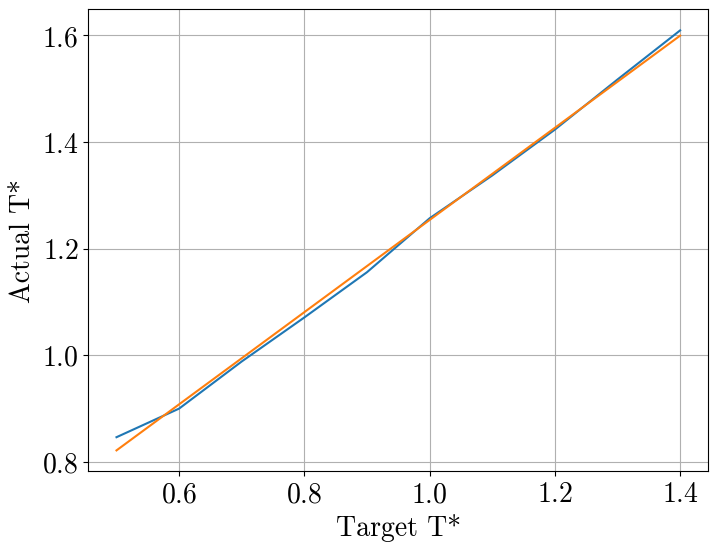

In [16]:
plt.plot(x1,ber)
gen=np.polyfit(x1,ber,1)
plt.plot(x1,gen[0]*x1+gen[1])
plt.grid()
plt.xlabel('Target T*')
plt.ylabel('Actual T*')
print(gen)

In [13]:
(1.2-gen[1])/gen[0]

2.376125277694086